In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot as plt

c:\Users\Branko\miniconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## Load datasets

In [3]:
dataset_path = '../../dataset/additional_datasets/'
dataset_name = 'Breast_GSE45827'
dataset_norm_suffix = '_norm'
dataset_pca_suffix = '_pca'

In [4]:
df_norm = pd.read_csv(dataset_path + dataset_name + dataset_norm_suffix + '.csv', index_col=0)
X_norm = df_norm.drop('type', axis=1)
y_norm = df_norm.type

In [5]:
df_pca = pd.read_csv(dataset_path + dataset_name + dataset_pca_suffix + '.csv', index_col=0)
X_pca = df_pca.drop('type', axis=1)
y_pca = df_pca.type

### Oversampling

In [6]:
smt = SMOTE(random_state=42)
X_norm_res, y_norm_res = smt.fit_resample(X_norm, y_norm)
X_pca_res, y_pca_res = smt.fit_resample(X_pca, y_pca)

## Train

In [7]:
def trainKNN(X, y, n_neighbors=2):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # create model instance
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    # fit model
    model.fit(X_train, y_train)

    preds = model.predict(X_test)
    return preds, y_test

def trainXGBoost(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # create model instance
    model = XGBClassifier()
    # fit model
    model.fit(X_train, y_train)

    preds = model.predict(X_test)
    return preds, y_test

In [8]:
xgboost_pred, xgboost_real = trainXGBoost(X_norm_res, y_norm_res)

c:\Users\Branko\miniconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\Branko\miniconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[01:20:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
knn_pred, knn_real = trainKNN(X_pca_res, y_pca_res)

## Plot

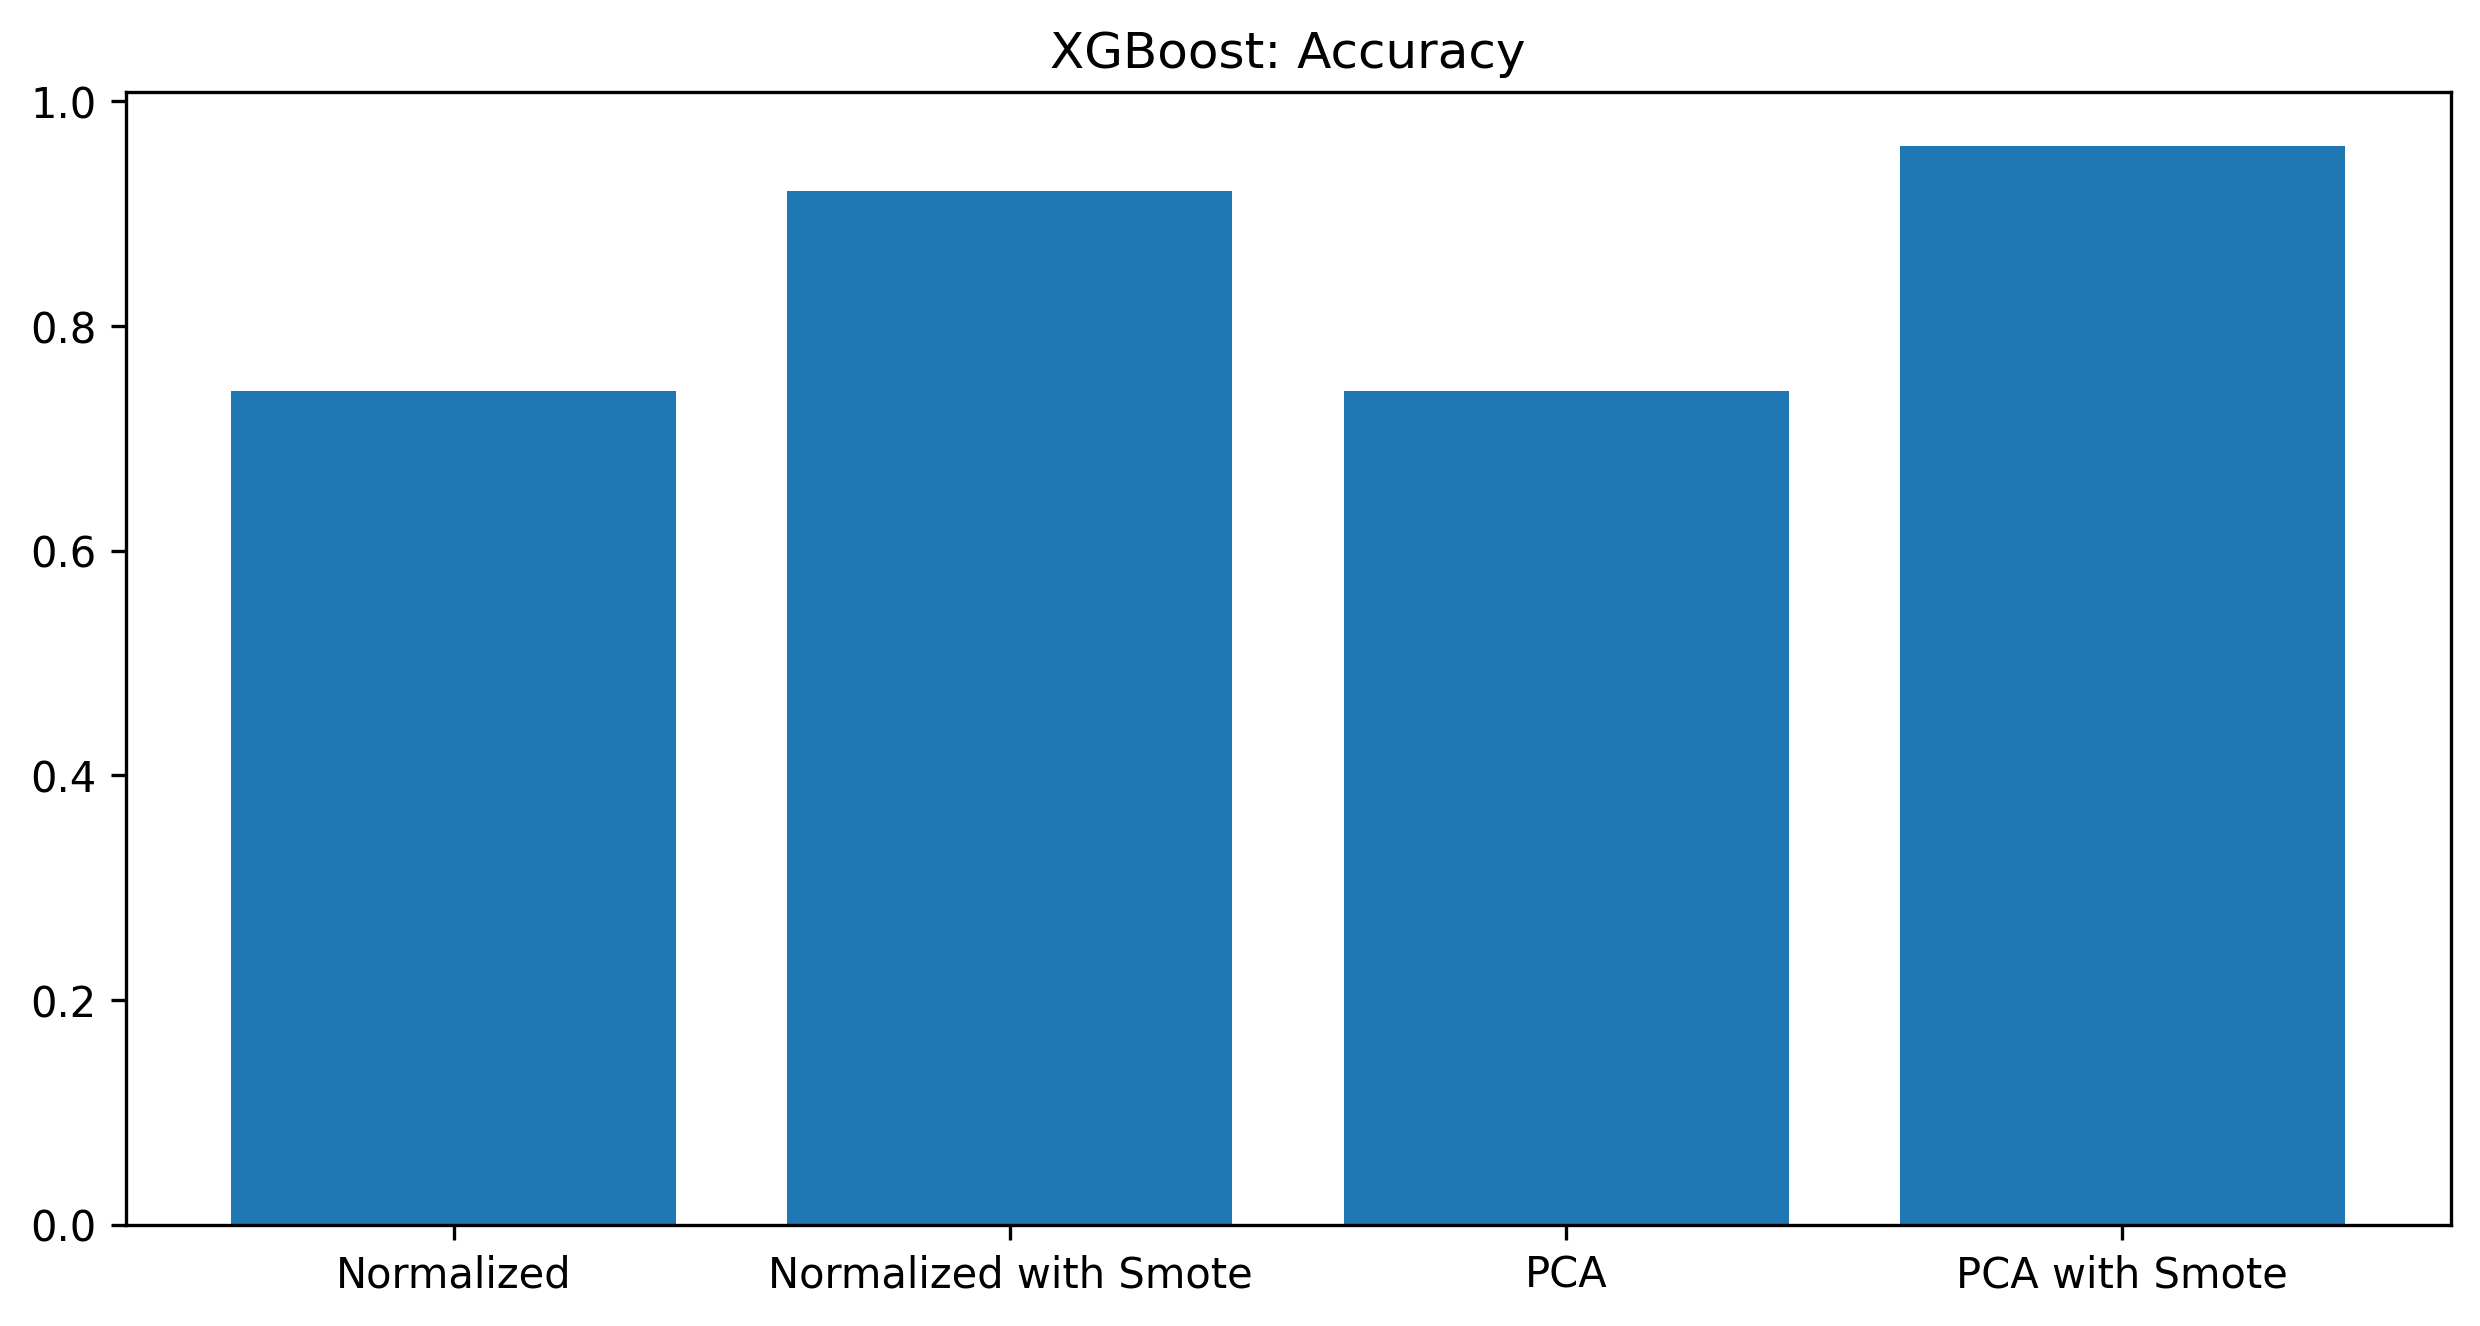

In [ ]:
plt.figure(figsize=(10, 5), dpi=300)
plt.bar(
    ['XGboost', 'KNN'], 
    [
        accuracy_score(xgboost_pred, xgboost_real), 
        accuracy_score(knn_pred, knn_real)
    ]
)
plt.title('Accuracy: Best from each model')
plt.show()

## Ensemble